<a href="https://colab.research.google.com/github/omdena/policy_pandemic/blob/master/task6_Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Curating the Dataset

In [0]:
df_raw = pd.read_csv('Health data + descriptors - Complete Aggregated Static Data.csv')

In [0]:
df_raw.head()

,Unnamed: 0,List of static healthcare parameters,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,Health care coverage,NaN,NaN,Financial expenditure on healthcare,NaN,NaN,NaN,Healthcare resources,NaN,NaN,General health of population,NaN,NaN,NaN,NaN,Other metrics,NaN,NaN
1,Country,Class,UHC_index_2017,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Health_Expenditure_per_GDP,Health_Expenditure_per_capita_PPP_USD$,OOP_per_capita_PPP,Total_public_and_private_health_insurance_cove...,Physicians_per_10000_population,Nurses_per_10000_population,Critical_Beds_per_10000_Population,Life_Expectancy_years,Probability_of_Dying_between_30_70_from_chroni...,Adult_Mortality_Rate_per_1000_population_2016 ...,population_over_65_in_%(2018),smoking_prevalence_2012(%),Population_Density_per_sq_km,Population_2019,Hand_hygiene_materials_at_points_of_care_2016 (%)
2,Argentina,Upper middle income,76,68.1,94.26,9.124314785,1916.50415,287.8306885,100,39.901,26,50,76.667,15.8,111,11.11778888,19.299999,16.36,44780677,NaN
3,Australia,High income,87,95.9,99.99,9.252,4816.153809,874.2332153,100,36.778,125.5,38.4,83.436,9.1,61,15.65647523,16.299999,3.281,25203198,NaN
4,Bangladesh,Low income,48,47.6,48.23,2.274248749,94.30201721,69.67479706,NaN,5.809,4.12,7.7,72.591,21.6,130,5.15839064,22.4,1253,163046161,68.8064


In [0]:
df_raw = df_raw.drop(df_raw.index[0])

In [0]:
df_raw.iloc[0,:].values

array(['Country', 'Class', 'UHC_index_2017',
       'Health_Access_Quality_Index_2016 (over 100)',
       'Basic_Sanitization_Service_%People', 'Health_Expenditure_per_GDP',
       'Health_Expenditure_per_capita_PPP_USD$', 'OOP_per_capita_PPP',
       'Total_public_and_private_health_insurance_coverage',
       'Physicians_per_10000_population', 'Nurses_per_10000_population',
       'Critical_Beds_per_10000_Population', 'Life_Expectancy_years',
       'Probability_of_Dying_between_30_70_from_chronic_diseases',
       'Adult_Mortality_Rate_per_1000_population_2016 (per 1000)',
       'population_over_65_in_%(2018)', 'smoking_prevalence_2012(%)',
       'Population_Density_per_sq_km', 'Population_2019',
       'Hand_hygiene_materials_at_points_of_care_2016 (%)'], dtype=object)

In [0]:
df_raw.columns = df_raw.iloc[0,:].values

In [0]:
df_raw.head()

,Country,Class,UHC_index_2017,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Health_Expenditure_per_GDP,Health_Expenditure_per_capita_PPP_USD$,OOP_per_capita_PPP,Total_public_and_private_health_insurance_coverage,Physicians_per_10000_population,Nurses_per_10000_population,Critical_Beds_per_10000_Population,Life_Expectancy_years,Probability_of_Dying_between_30_70_from_chronic_diseases,Adult_Mortality_Rate_per_1000_population_2016 (per 1000),population_over_65_in_%(2018),smoking_prevalence_2012(%),Population_Density_per_sq_km,Population_2019,Hand_hygiene_materials_at_points_of_care_2016 (%)
1,Country,Class,UHC_index_2017,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Health_Expenditure_per_GDP,Health_Expenditure_per_capita_PPP_USD$,OOP_per_capita_PPP,Total_public_and_private_health_insurance_cove...,Physicians_per_10000_population,Nurses_per_10000_population,Critical_Beds_per_10000_Population,Life_Expectancy_years,Probability_of_Dying_between_30_70_from_chroni...,Adult_Mortality_Rate_per_1000_population_2016 ...,population_over_65_in_%(2018),smoking_prevalence_2012(%),Population_Density_per_sq_km,Population_2019,Hand_hygiene_materials_at_points_of_care_2016 (%)
2,Argentina,Upper middle income,76,68.1,94.26,9.124314785,1916.50415,287.8306885,100,39.901,26,50,76.667,15.8,111,11.11778888,19.299999,16.36,44780677,NaN
3,Australia,High income,87,95.9,99.99,9.252,4816.153809,874.2332153,100,36.778,125.5,38.4,83.436,9.1,61,15.65647523,16.299999,3.281,25203198,NaN
4,Bangladesh,Low income,48,47.6,48.23,2.274248749,94.30201721,69.67479706,NaN,5.809,4.12,7.7,72.591,21.6,130,5.15839064,22.4,1253,163046161,68.8064
5,Brazil,Upper middle income,79,63.8,88.29,9.467476606,1472.230957,404.208313,22.8,21.643,101.2,22,75.881,16.6,143,8.922837832,13.8,25.25,211049527,NaN


In [0]:
df = df_raw.drop(df_raw.index[0])

In [0]:
df.head()

,Country,Class,UHC_index_2017,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Health_Expenditure_per_GDP,Health_Expenditure_per_capita_PPP_USD$,OOP_per_capita_PPP,Total_public_and_private_health_insurance_coverage,Physicians_per_10000_population,Nurses_per_10000_population,Critical_Beds_per_10000_Population,Life_Expectancy_years,Probability_of_Dying_between_30_70_from_chronic_diseases,Adult_Mortality_Rate_per_1000_population_2016 (per 1000),population_over_65_in_%(2018),smoking_prevalence_2012(%),Population_Density_per_sq_km,Population_2019,Hand_hygiene_materials_at_points_of_care_2016 (%)
2,Argentina,Upper middle income,76,68.1,94.26,9.124314785,1916.50415,287.8306885,100,39.901,26,50,76.667,15.8,111,11.11778888,19.299999,16.36,44780677,NaN
3,Australia,High income,87,95.9,99.99,9.252,4816.153809,874.2332153,100,36.778,125.5,38.4,83.436,9.1,61,15.65647523,16.299999,3.281,25203198,NaN
4,Bangladesh,Low income,48,47.6,48.23,2.274248749,94.30201721,69.67479706,NaN,5.809,4.12,7.7,72.591,21.6,130,5.15839064,22.4,1253,163046161,68.8064
5,Brazil,Upper middle income,79,63.8,88.29,9.467476606,1472.230957,404.208313,22.8,21.643,101.2,22,75.881,16.6,143,8.922837832,13.8,25.25,211049527,NaN
6,Canada,High income,89,93.8,99.29,10.734,4928.62793,700.838562,100,23.105,99.44,25,82.434,9.8,63,17.23200668,14.5,4.114,37411047,NaN


#### Pre-processing and Feature Selection

The features to be included in the decision making:

    1. Physicians_per_10000 population
    2. Critical_Beds_per_10000_Population
    3. Probability_of_Dying_between_30_70
    4. Health_Access_Quality_Index_2016 (over 100)
    5. Basic_Sanitization_Service_%People
    Extra two features:
    6. Adult_Mortality_Rate_per_1000_population_2016 (per 1000)
    7. Life_Expectancy_years

In [0]:


df.columns

Index(['Country', 'Class', 'UHC_index_2017',
       'Health_Access_Quality_Index_2016 (over 100)',
       'Basic_Sanitization_Service_%People', 'Health_Expenditure_per_GDP',
       'Health_Expenditure_per_capita_PPP_USD$', 'OOP_per_capita_PPP',
       'Total_public_and_private_health_insurance_coverage',
       'Physicians_per_10000_population', 'Nurses_per_10000_population',
       'Critical_Beds_per_10000_Population', 'Life_Expectancy_years',
       'Probability_of_Dying_between_30_70_from_chronic_diseases',
       'Adult_Mortality_Rate_per_1000_population_2016 (per 1000)',
       'population_over_65_in_%(2018)', 'smoking_prevalence_2012(%)',
       'Population_Density_per_sq_km', 'Population_2019',
       'Hand_hygiene_materials_at_points_of_care_2016 (%)'],
      dtype='object')

In [0]:
df_final = df.loc[:, ['Country','Physicians_per_10000_population','Critical_Beds_per_10000_Population',
                      'Probability_of_Dying_between_30_70_from_chronic_diseases','Health_Access_Quality_Index_2016 (over 100)',
                     'Basic_Sanitization_Service_%People',
                     'Adult_Mortality_Rate_per_1000_population_2016 (per 1000)',
                     'Life_Expectancy_years']]

In [0]:
df_temp = df_final.copy()

In [0]:
len(df_temp.columns)

8

In [0]:
df_temp.head()

,Country,Physicians_per_10000_population,Critical_Beds_per_10000_Population,Probability_of_Dying_between_30_70_from_chronic_diseases,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Adult_Mortality_Rate_per_1000_population_2016 (per 1000),Life_Expectancy_years
2,Argentina,39.901,50,15.8,68.1,94.26,111,76.667
3,Australia,36.778,38.4,9.1,95.9,99.99,61,83.436
4,Bangladesh,5.809,7.7,21.6,47.6,48.23,130,72.591
5,Brazil,21.643,22,16.6,63.8,88.29,143,75.881
6,Canada,23.105,25,9.8,93.8,99.29,63,82.434


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

df_temp.iloc[:,1:] = scaler.fit_transform(df_temp.iloc[:,1:])

In [0]:
df_temp.head()

,Country,Physicians_per_10000_population,Critical_Beds_per_10000_Population,Probability_of_Dying_between_30_70_from_chronic_diseases,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Adult_Mortality_Rate_per_1000_population_2016 (per 1000),Life_Expectancy_years
2,Argentina,1.57315,0.65704,-0.19096,0.109572,0.56649,-0.325189,0.253676
3,Australia,1.34076,0.274832,-1.33623,1.32802,0.801507,-1.00658,1.23502
4,Bangladesh,-0.963689,-0.736701,0.800468,-0.788921,-1.32144,-0.0662588,-0.337249
5,Brazil,0.214543,-0.265531,-0.054211,-0.0788921,0.321629,0.110904,0.139724
6,Canada,0.323333,-0.166684,-1.21657,1.23598,0.772796,-0.979328,1.08976


In [0]:
print('Number of Countries: ', df_temp.shape[0])

Number of Countries:  35


# Spectal clustering



In [0]:
from sklearn.cluster import SpectralClustering

In [0]:
X = df_temp.iloc[:,1:].values
spectral_clustering = SpectralClustering(n_clusters=7,
                                assign_labels="discretize",
                                random_state=0).fit(X)
spectral_clustering.labels_

array([2, 6, 5, 0, 6, 0, 6, 6, 0, 5, 4, 2, 5, 5, 0, 6, 3, 4, 3, 0, 5, 5,
       5, 2, 5, 6, 1, 2, 6, 0, 0, 0, 5, 5, 1])

#### Plotting the Clusters

In [0]:
df_temp.head()

,Country,Physicians_per_10000_population,Critical_Beds_per_10000_Population,Probability_of_Dying_between_30_70_from_chronic_diseases,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Adult_Mortality_Rate_per_1000_population_2016 (per 1000),Life_Expectancy_years
2,Argentina,1.57315,0.65704,-0.19096,0.109572,0.56649,-0.325189,0.253676
3,Australia,1.34076,0.274832,-1.33623,1.32802,0.801507,-1.00658,1.23502
4,Bangladesh,-0.963689,-0.736701,0.800468,-0.788921,-1.32144,-0.0662588,-0.337249
5,Brazil,0.214543,-0.265531,-0.054211,-0.0788921,0.321629,0.110904,0.139724
6,Canada,0.323333,-0.166684,-1.21657,1.23598,0.772796,-0.979328,1.08976


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components= 2)

In [0]:
X_pca = pca.fit_transform(X)

In [0]:
cluster_df = pd.DataFrame()

In [0]:
cluster_df['Country'] = df_temp['Country']

In [0]:
component_1 = []
component_2 = []

for i in range(len(X_pca)):
    component_1.append(X_pca[i][0])
       
for j in range(len(X_pca)):
    component_2.append(X_pca[j][1])

In [0]:
cluster_df['pca_1'] = component_1
cluster_df['pca_2'] = component_2

In [0]:
cluster_df['Cluster'] = spectral_clustering.labels_

In [0]:
cluster_df.head(10)

,Country,pca_1,pca_2,Cluster
2,Argentina,-1.372158,0.353764,2
3,Australia,-2.821233,-0.552294,6
4,Bangladesh,1.821285,-0.342210,5
5,Brazil,-0.127555,-0.251040,0
6,Canada,-2.132601,-0.876596,6
7,Costa Rica,-1.364930,-1.046623,0
8,Germany,-2.968830,0.858238,6
9,Denmark,-2.424085,-0.848033,6
10,Ecuador,-0.409289,-0.721966,0
11,Egypt,1.413036,0.136110,5


In [0]:
#cluster_df.to_csv('clustered_data.csv')

In [0]:
cluster_df.columns

Index(['Country', 'pca_1', 'pca_2', 'Cluster'], dtype='object')

Text(0.5, 1.0, 'Cluster Plot for 7 Features')

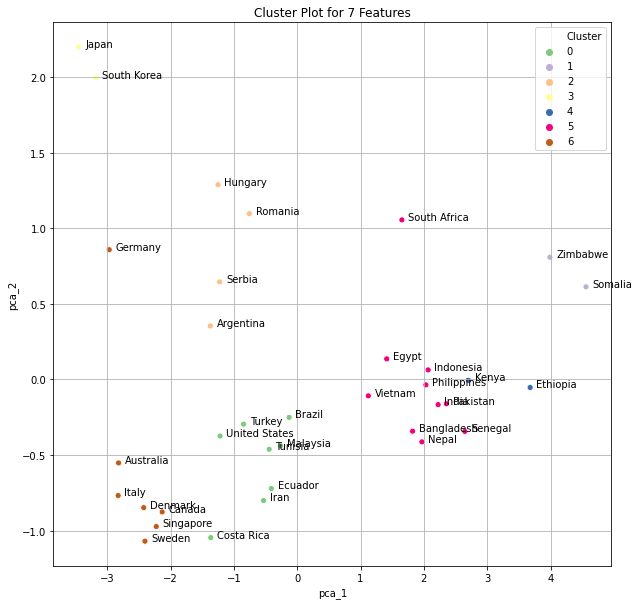

In [0]:
# basic plot
plt.figure(figsize=(10,10))
p1 = sns.scatterplot(x= 'pca_1', y= 'pca_2', data= cluster_df, hue= 'Cluster', palette = 'Accent')

for line in range(0,cluster_df.shape[0]):
    p1.text(cluster_df.pca_1.iloc[line]+0.1, cluster_df.pca_2.iloc[line], cluster_df.Country.iloc[line],  horizontalalignment='left', size='medium', color='black', weight='medium')
    
p1.grid()
plt.title('Cluster Plot for 7 Features')

# Finding optimal cluster number

In [0]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 7):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

In [0]:
affinity_matrix = getAffinityMatrix(X, k = 7)

In [0]:
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

Optimal number of clusters [2 7 1 3 6]


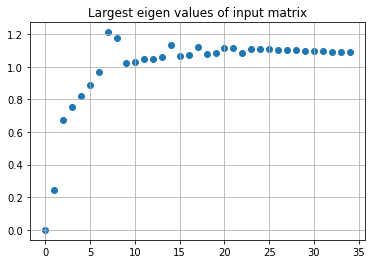

In [0]:
affinity_matrix = getAffinityMatrix(X, k = 10)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')